<a href="https://colab.research.google.com/github/cryingjin/Today-I-Learned/blob/master/COVID19_assignment3_yj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-Clustering
앞으로 7-8월 간단한 NLP와 클러스터링, 그리고 bokeh를 통한 구현을 진행하는 것이 목표입니다. 잘되면 다른 데이터에 접목시켜보는 시간도 가져보아요 

***
## Task
- data : https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge
- 데이터는 kaggle 사이트에 올라와있는 논문 파일을 사용, 2020.07.17 기준 다운받은 ver36 데이터 13GB 줄여서 사용
- 데이터는 최신 논문만 다루는 것으로, 데이터의 갯수 3000-5000개로 줄여서 진행

## Flow
1. Data load, EDA, Pre-Processing
2. Word Tokeninzing
3. Word Embedding
4. Dimensionality Reduction (PCA, t-SNE)
5. Clustering
6. Visualization
7. ETC

***
## <span style="color:red"> Assignment3 To Do List
오늘 진행할 과제는 다음과 같습니다.
0. pickle 파일로 assignment2 데이터 불러오기
1. 차원축소 (효율적인 분석과 시각화를 위해)    
2. 클러스터링 (k means 알고리즘 사용)  
3. 저장  
  
#### <span style="color:red"> 오늘 과제는 퀴즈 형식이 아닙니다.  
새로운 주피터 노트북 파일을 여시고 옆에 두신 후에 제 코드를 다 따라쳐서 오는 것이 과제 입니다!  
미래의 자신이 다시 봐도 이해할 수 있도록 주석도 달아주세요!

***
## Ready
- 모듈 준비하기
- assignment2 파일 불러오기  
#### <span style="color:red"> 지난 주 더 추가했던 불용어를 추가 제거한 파일을 드리겠습니다!  
>COViD19_assignment2_0730.pickle  
>COViD19_assignment2_X_0730.pickle  



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Daewoong

/content/drive/My Drive/Daewoong


In [ ]:
# ready
import pandas as pd
import numpy as np
import glob
import json
from tqdm import tqdm
import pickle
import string

# visualize modules 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('ggplot') 더 예쁜 seaborn 사용

지난과제에서 만든 pickle 파일을 불러오겠습니다~  
모두 같은 폴더에 있으면 불러오기 쉽습니다!  

In [ ]:
# Pickle 불러오기
with open('COVID19_assignment2_0730.pickle','rb') as fr:
    data = pickle.load(fr)
with open('COVID19_assignment2_X_0730.pickle','rb') as fr:
    X = pickle.load(fr)

print(X)

  (0, 1980)	0.0027280505685868877
  (0, 415)	0.003054155453349009
  (0, 3067)	0.0038750121814876914
  (0, 1917)	0.005004830807168685
  (0, 3327)	0.0044975283981980654
  (0, 1034)	0.0027900635554403176
  (0, 1767)	0.005071068625520438
  (0, 3081)	0.004674562890098702
  (0, 2397)	0.004840395337318808
  (0, 1008)	0.00353222446261112
  (0, 930)	0.006062392245093567
  (0, 1932)	0.0051065739856233855
  (0, 3766)	0.006902695641630412
  (0, 162)	0.004666049246150594
  (0, 695)	0.0032632897086869095
  (0, 2900)	0.015778924812931902
  (0, 192)	0.004746498836230247
  (0, 642)	0.00418803085919972
  (0, 1532)	0.0053102921786904985
  (0, 765)	0.003264210305783047
  (0, 3442)	0.005351304050422571
  (0, 512)	0.005049586751876597
  (0, 2662)	0.005446572688979349
  (0, 1180)	0.00585391651540603
  (0, 1181)	0.006468897081884694
  :	:
  (9376, 945)	0.02599109531164156
  (9376, 928)	0.021230171261612668
  (9376, 1448)	0.020687637953858168
  (9376, 3524)	0.010516019037196867
  (9376, 500)	0.0119206574498165

In [ ]:
data.head(2)

,paper_id,doi,abstract,body_text,publish_time,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words,processed_text
27,001c739361ad2fadb6f2d22f14dfe23e772eb5b1,10.3390/diagnostics10060399,The current coronavirus disease 2019 pandemic ...,"On 30 January 2020, the World Health Organizat...",2020-06-11,"James, Ameh S.. Alwneh, John I.",COVID-19 Infection Diagnosis: Potential<b...,Diagnostics (Basel),The current coronavirus disease 2019 pa...,1614,38904,78,30 january 2020 world health organization decl...
31,0020e5c796f50e927b96ff0b7ea375b4745261a3,10.1186/s12887-020-02112-x,Background: One major limitation for less inva...,Respiratory Distress Syndrome (RDS) affects 85...,2020-05-08,"Chevallier, Marie. Durrmeyer, Xavier. ...",Propofol versus placebo (with rescue wi...,BMC Pediatr,Background: One major limitation for le...,286,25663,81,respiratory distress syndrome rds affect 85 pr...


## 1. 차원축소
PCA, t-sne  


In [ ]:
X.shape

(9377, 4096)

현재 data 의 차원은 (9377,4096) 입니다.  
시각화 시킬 수도 없고 분석하기에도 어렵기 때문에 차원 축소를 사용해서 2차원으로 줄이고 시각화 해주는 것이 목표입니다!

pca - k means - t-sne

In [ ]:
# PCA / Clustering modules
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

In [ ]:
# 사용 모델 만들기
pca_90 = PCA(n_components=0.9, random_state=42)      # 90%의 설명력을 보존

# X에 적용
X_reduced_90 = pca_90.fit_transform(X.toarray())
X_reduced_90.shape      # 확인

(9377, 1779)

In [ ]:
X_reduced_90

array([[ 0.00186016,  0.12806816,  0.06364383, ..., -0.01364048,
        -0.00942947,  0.01404789],
       [-0.00992769, -0.07469433, -0.09279252, ..., -0.00226034,
         0.00241322,  0.00998854],
       [ 0.03890484, -0.15618776,  0.04197662, ...,  0.00842976,
         0.0012846 , -0.00877924],
       ...,
       [ 0.31901803, -0.25333046,  0.07323131, ..., -0.00840828,
         0.00177998, -0.00650443],
       [-0.06221894,  0.22279006, -0.05043737, ...,  0.00974599,
        -0.00227223,  0.01062849],
       [-0.17539115, -0.11272873,  0.13282017, ...,  0.00765909,
         0.02598001,  0.00705666]])

In [ ]:
pca_80 = PCA(n_components=0.80, random_state=42)

X_reduced_80 = pca_80.fit_transform(X.toarray())
X_reduced_80.shape

(9377, 1122)

데이터를 80% 의 설명력을 가지도록 만든 다는 것은 원래의 데이터에서 차원을 축소하면서 몇가지의 특징을 버리고, 데이터의 80% 설명가능한 데이터를 사용한다는 것을 뜻입니다.  
80% 의 설명력을 가진 데이터로 차원축소를 하면서 본래의 차원은 (9377, 4096) 였지만 (9377, 1122) 까지 줄어들었습니다.


## 2. 클러스터링
### K means 알고리즘  
이제 80%만 설명가능하도록 만든 데이터로 클러스터링을 적용하겠습니다.  
단 클러스터링 후에는 시각화를 위해서 차원을 2차원까지 줄이겠습니다.  
클러스터링은 클러스터의 갯수 k 찾기 -> 클러스터링하기(군집화) -> 시각화해보기  
로 이뤄집니다!


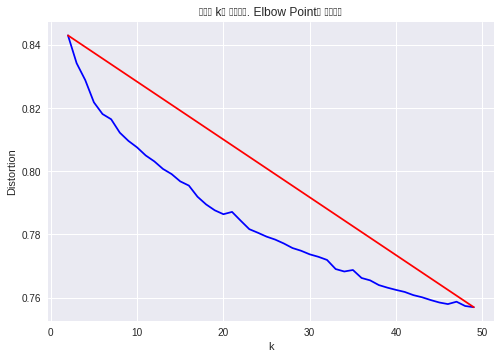

In [ ]:
# 최적의 K 찾기 : 군집 갯수 k 찾기

# K=50 개의 클러스터에 대해서 시각화
distortions = []
K = range(2, 50)
tqdm.pandas()
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced_80)
    k_means.fit(X_reduced_80)
    distortions.append(sum(np.min(cdist(X_reduced_80, k_means.cluster_centers_, 'euclidean'), axis=1)) / X_reduced_80.shape[0])
    #print('Found distortion for {} clusters'.format(k))

# Visualization
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('최적의 k는 어디일까. Elbow Point를 찾아보자')
plt.show()

안타깝게도 k를 찾는 것은 너무 오래 걸렸습니다..   
데이터가 많은데 for 문이 계속 돌면서 최적의 값을 찾기 때문인데요...  
여러분은 돌리지 마시고 이렇게 찾는 구나~ 하고 아시기만 하셔도 됩니다. 

위의 코드를 안돌려보실 분들은 바로 아래의 코드부터 해보셔도 됩니다!

k를 찾을 때는 위의 코드를 사용하시면 되니, 다른 데이터를 분석하실 때 그대로 써주세요  
열심히 찾은 결과 __k=20__ 정도로 설정하면 될 것 같습니다.

In [ ]:
# 최적의 k=20으로 진행
k=20
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced_80)
y_pred

array([ 4,  7, 16, ...,  5, 14,  6], dtype=int32)

위와 같이 클러스터링을 하는 코드는 몇줄이면 됩니다.
먼저 k의 갯수를 설정해주고 KMeans라는 모델을 간편하게 kmeans라고 부르겠다고 설정했습니다. 이때 클러스터의 갯수는 k, random_state=42로 설정했습니다. 이 부분은 자유롭게 바꾸시면 되는데 설명이 필요하시면 말해주세요!

y_pred는 kmeans 를 'X_reduced_80'변수에 적용했을 때 예측되는 값 입니다  

y_pred는 9377개의 데이터를 20가지(k개)의 클래스로 나눠서 분류해놨을 겁니다!

## 3. 시각화
데이터를 군집화한 것을 시각화 하겠습니다.  
먼저 데이터를 2차원으로 축소하고 시각화해본 후에, 
아까 우리가 클러스터링 모델을 사용해서 군집화한 데이터를 시각화해보겠습니다.  

시각화 가능하도록 2차원으로 줄이기 위해서 t-sne라는 차원 축소를 적용합니다.  


__t-SNE 함수 설명__  
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html  
perplexityfloat, optional (default: 30)
The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.

In [ ]:
# t-SNE 로 2D 까지 차원 축소! # n_components = 2 가 디폴트
tsne = TSNE(verbose=1, perplexity=100, random_state=42)     # t-sne 모델 설정
X_embedded = tsne.fit_transform(X.toarray())
X_embedded.shape

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 9377 samples in 10.867s...
[t-SNE] Computed neighbors for 9377 samples in 930.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9377
[t-SNE] Computed conditional probabilities for sample 2000 / 9377
[t-SNE] Computed conditional probabilities for sample 3000 / 9377
[t-SNE] Computed conditional probabilities for sample 4000 / 9377
[t-SNE] Computed conditional probabilities for sample 5000 / 9377
[t-SNE] Computed conditional probabilities for sample 6000 / 9377
[t-SNE] Computed conditional probabilities for sample 7000 / 9377
[t-SNE] Computed conditional probabilities for sample 8000 / 9377
[t-SNE] Computed conditional probabilities for sample 9000 / 9377
[t-SNE] Computed conditional probabilities for sample 9377 / 9377
[t-SNE] Mean sigma: 0.349572
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.067924
[t-SNE] KL divergence after 1000 iterations: 1.776671


(9377, 2)

(9377, 2) 차원의 2차원 형태가 되었습니다! 이제 차원축소한 데이터를 시각화해볼게요

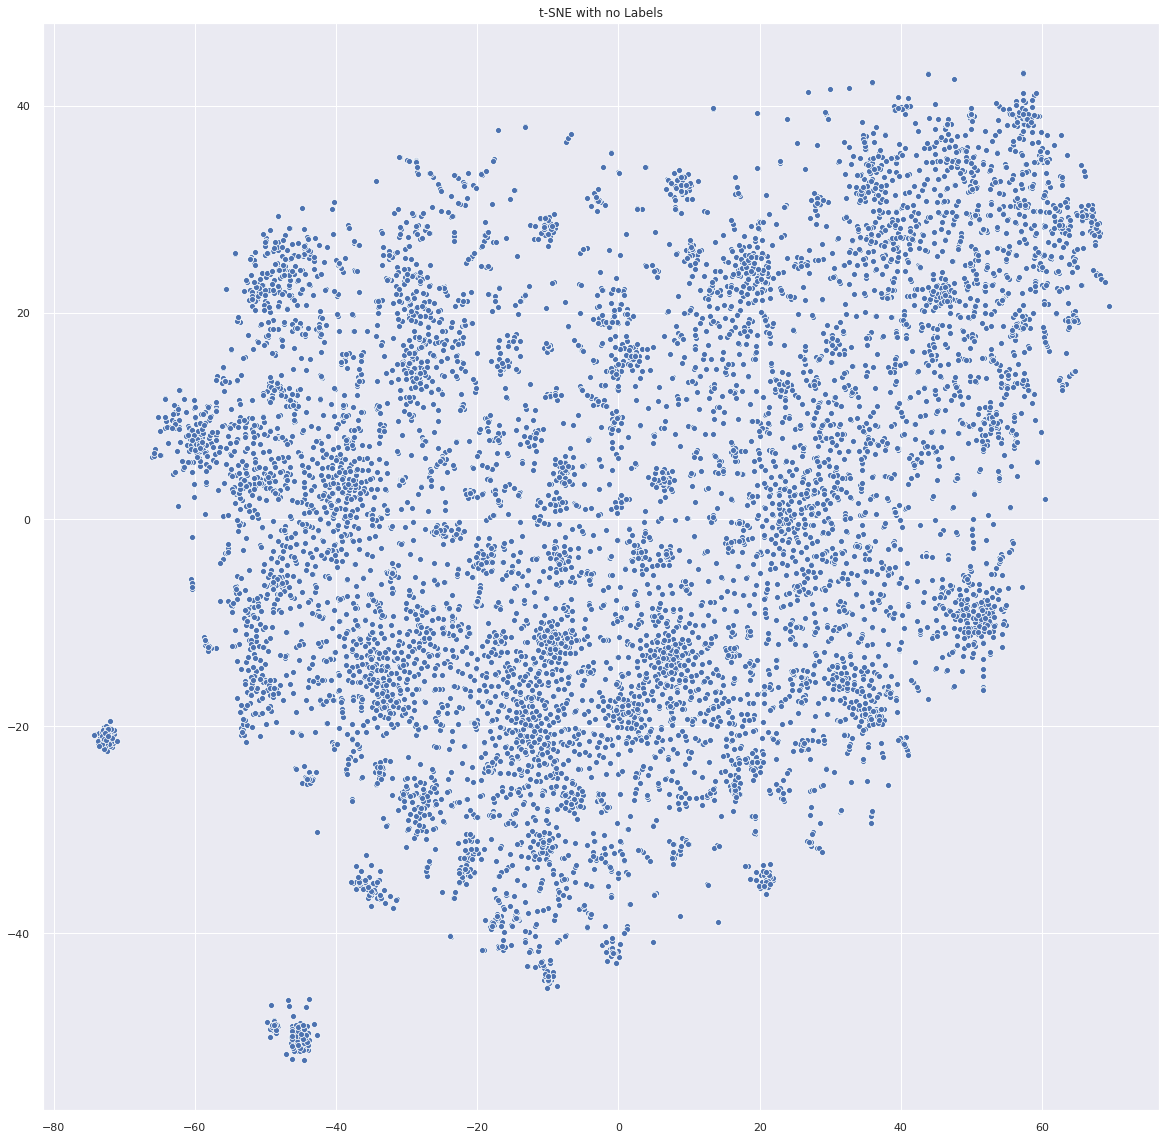

In [ ]:
# sns settings
sns.set(rc={'figure.figsize':(20,20)})

# colors : 한가지 색으로만 시각화
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")      # 현재 파일 경로에 저장!
plt.show()

이제 현재 가진 데이터를 2차원으로 시각화하면 저런 모양이구나~~ 알수있습니다.  
2차원에 있는 데이터를 군집별로 색을 칠해서 나타내면 어떤 모양일지 시각화해보겠습니다.   

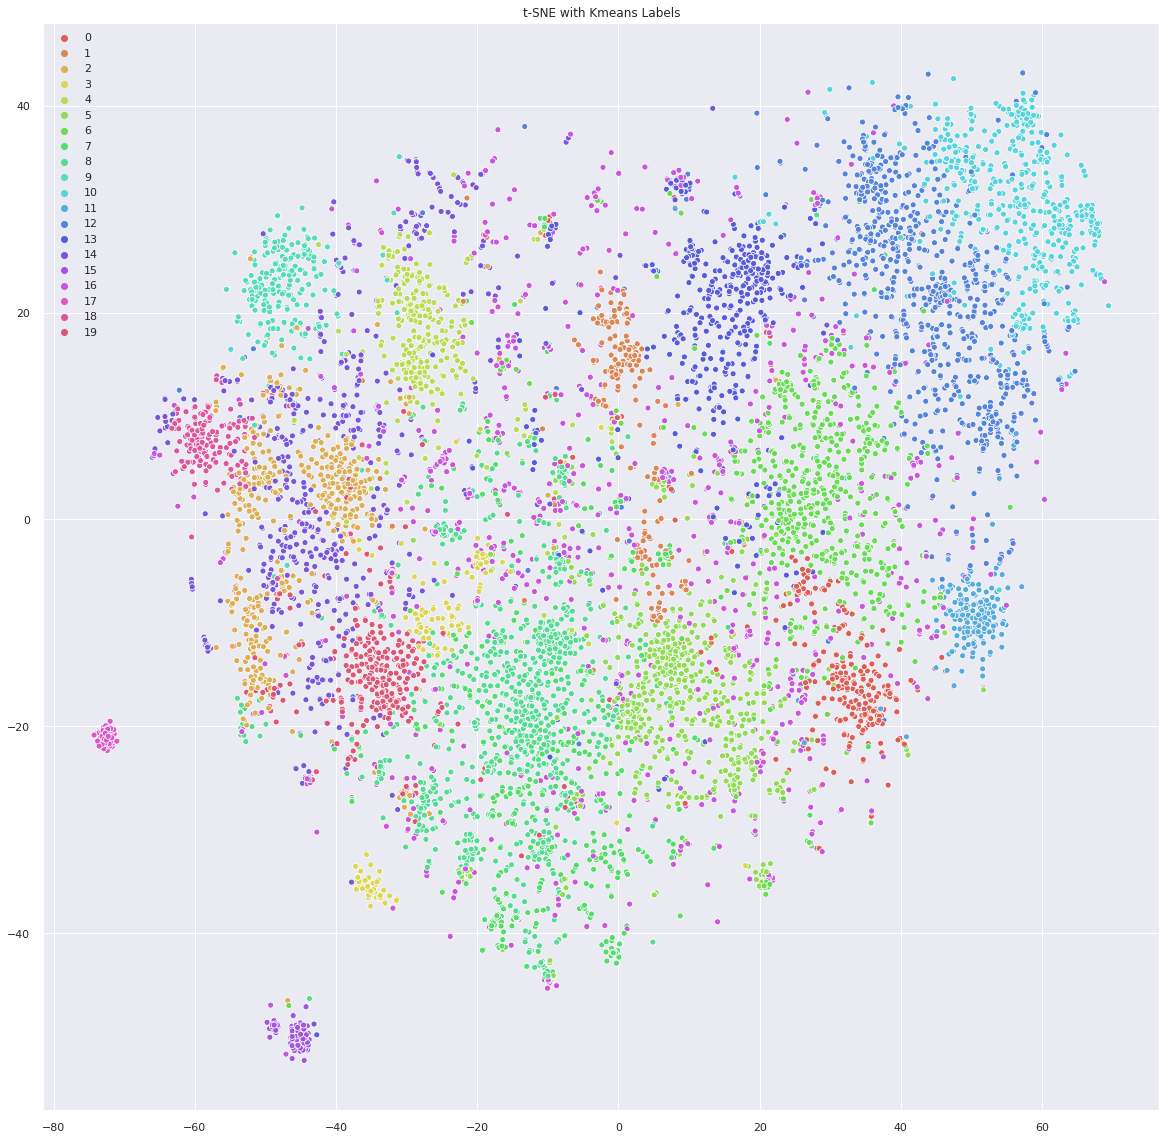

In [ ]:
%matplotlib inline

# sns settings
sns.set(rc={'figure.figsize':(20,20)})

# colors
#palette = sns.hls_palette(20, l=.4, s=.9)      
palette = sns.hls_palette(20)  
# plot
# hue=y_pred 클러스터 별로 색 다르게 칠하기
sns.scatterplot(X_embedded[:,0], X_embedded[:,1],hue=y_pred, palette=palette)
#sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)     
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

## Save  
중간 저장을 해줄게요 토크나이징과 임베딩까지 시간이 오래걸리셨죠?  
다음번에는 이 작업을 없이 과제를 진행할 수 있도록 pickle로 저장해주세요!  

In [ ]:
# data 데이터프레임
# pickle 저장
with open('COVID19_assignment3.pickle','wb') as fw:
    pickle.dump(data,fw)

In [ ]:
# pickle 저장
with open('COVID19_assignment3_X_embedded.pickle','wb') as fw:
    pickle.dump(X_embedded,fw)

# 확인해주세요!
그래프 사진 2개와, data 데이터프레임, X_embedded 데이터가 파일로 모두 저장되었는지 꼭 확인해주세요!  
# 고생하셨습니다~~
질문은 언제든지 연락주세요~!!